<a href="https://colab.research.google.com/github/jannelaroshni195/Parkinson-s-Disease-Detection/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data= pd.read_csv(url)

# View basic info
#print(data.info())

# Show first few rows
print(data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Drop 'name' column (not a feature)
data = data.drop(['name'], axis=1)

# Split features and target
X = data.drop(['status'], axis=1)
y = data['status']

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

# For ML models
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_svm = svm.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print("NB Accuracy:", accuracy_score(y_test, y_pred_nb)*100)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm)*100)




KNN Accuracy: 89.83050847457628
NB Accuracy: 76.27118644067797
SVM Accuracy: 88.13559322033898


In [ ]:

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.92      0.75      0.82        44

    accuracy                           0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77   

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Build FNN
fnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile with lower learning rate
fnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train
fnn_model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

# Predict & Evaluate
y_pred_fnn = (fnn_model.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_fnn)

print("FNN Accuracy:", round(acc * 100, 2), "%")
print("FNN Classification Report:\n", classification_report(y_test, y_pred_fnn))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
FNN Accuracy: 94.92 %
FNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Reshape input for CNN
X_cnn_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_cnn_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build high-accuracy CNN
cnn_model = Sequential([
    Conv1D(128, kernel_size=2, activation='relu', input_shape=(X_cnn_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(256, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile with lower learning rate
cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_cnn_train, y_train, epochs=100, batch_size=8, verbose=0)

# Predict & Evaluate
y_pred_cnn = (cnn_model.predict(X_cnn_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_cnn)

print("CNN Accuracy:", round(acc * 100, 2), "%")
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
CNN Accuracy: 88.14 %
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.93      0.91      0.92        44

    accuracy                           0.88        59
   macro avg       0.84      0.85      0.85        59
weighted avg       0.88      0.88      0.88        59



In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Knn Confusion Matrix:\n", cm_knn)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naïve Bayes Confusion Matrix:\n", cm_nb)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", cm_svm)
cm_fnn = confusion_matrix(y_test, y_pred_fnn)
print("FNN Confusion Matrix:\n", cm_fnn)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
print("CNN Confusion Matrix:\n", cm_cnn)


Knn Confusion Matrix:
 [[10  5]
 [ 1 43]]
Naïve Bayes Confusion Matrix:
 [[12  3]
 [11 33]]
SVM Confusion Matrix:
 [[ 8  7]
 [ 0 44]]
FNN Confusion Matrix:
 [[12  3]
 [ 0 44]]
CNN Confusion Matrix:
 [[12  3]
 [ 4 40]]


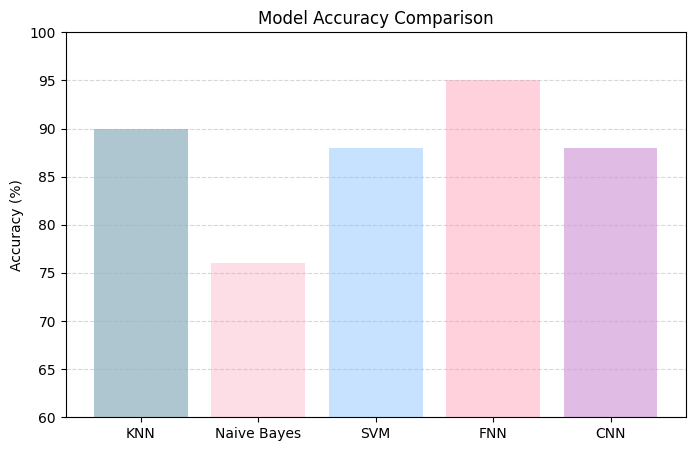

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'Naive Bayes', 'SVM', 'FNN', 'CNN']
accuracies = [0.90, 0.76, 0.88, 0.95, 0.88]

# Light pastel color palette
colors = ['#aec6cf', '#fddde6', '#c6e2ff', '#ffd1dc', '#e0bbE4']

plt.figure(figsize=(8, 5))
plt.bar(models, [acc * 100 for acc in accuracies], color=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(60, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


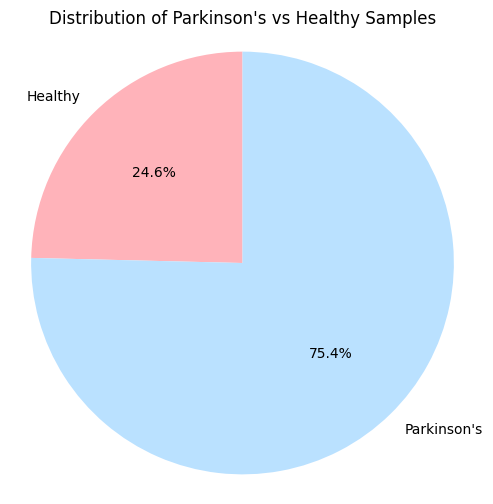

In [ ]:
labels = ['Healthy', 'Parkinson\'s']
counts = [48, 147]

colors = ['#ffb3ba', '#bae1ff']  # Light red and light blue

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=False)
plt.title('Distribution of Parkinson\'s vs Healthy Samples')
plt.axis('equal')
plt.show()


In [ ]:
!apt-get install -qq git
!git clone https://github.com/jannelaroshni195/Parkinson-Disease-Detection
!git add .
!git commit -m "okay"
!git push origin main

Cloning into 'Parkinson-Disease-Detection'...
fatal: could not read Username for 'https://github.com': No such device or address
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
